In [1]:
from BBBacktesterModule import *
spread = 1.4
pips = 0.0001

## Define a tester object

In [2]:
tester = BBBacktester("AUD_HKD_2016_2021.csv", "c", "2016-01-01", "2019-12-31", spread*pips/2) 
        #mult by 2 for a 'round trip', multiply by pips
    

## Optimize parameters and plot best strategy backtest

BEST COMBINATION: FREQUENCY = 365.0-MINUTE CHART | SMA = 130.0 | DEV = 1.7777777777777777 | Multiple = 1.25111
----------------------------------------------------------------------------------------------------


SIMPLE CONTRARIAN STRATEGY | INSTRUMENT = c | FREQ = 365.0 | SMA = 130 | DEV = 1.7777777777777777
----------------------------------------------------------------------------------------------------


PERFORMANCE MEASURES:


Multiple (Strategy):         2.439165
Multiple (Buy-and-Hold):     0.918933
--------------------------------------
Out-/Underperformance:       1.520232


CAGR:                        0.268135
Annualized Mean:             0.238456
Annualized Std:              0.426258
Sharpe Ratio:                0.559418
Sortino Ratio:               0.786939
Maximum Drawdown:            0.580182
Calmar Ratio:                0.462157
Max Drawdown Duration:       925 Days
Kelly Criterion:             1.817283


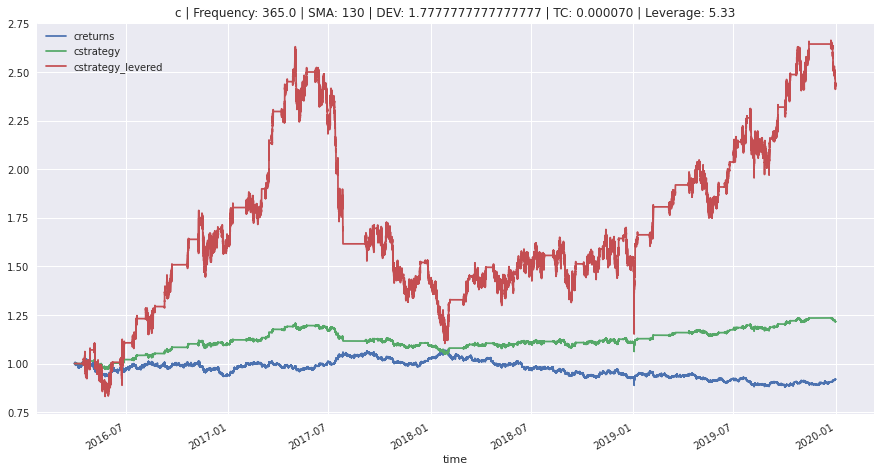

In [3]:
tester.optimize_strategy((5,400,40),(10,150,40),(1,2,10), metric = "Multiple") #quick
half_kelly = (tester.calculate_kelly_criterion(tester.results.strategy))/2
tester.add_leverage(leverage = half_kelly, sl = -0.35)
tester.plot_results(leverage = True)

## Test optimal strategy on forward data

SIMPLE CONTRARIAN STRATEGY | INSTRUMENT = c | FREQ = 365.0 | SMA = 130 | DEV = 1.7777777777777777
----------------------------------------------------------------------------------------------------


PERFORMANCE MEASURES:


Multiple (Strategy):         1.080606
Multiple (Buy-and-Hold):     1.070992
--------------------------------------
Out-/Underperformance:       0.009614


CAGR:                        0.045235
Annualized Mean:             0.044178
Annualized Std:              0.166927
Sharpe Ratio:                0.264652
Sortino Ratio:               0.374551
Maximum Drawdown:            0.177537
Calmar Ratio:                0.254793
Max Drawdown Duration:       526 Days
Kelly Criterion:             2.085400


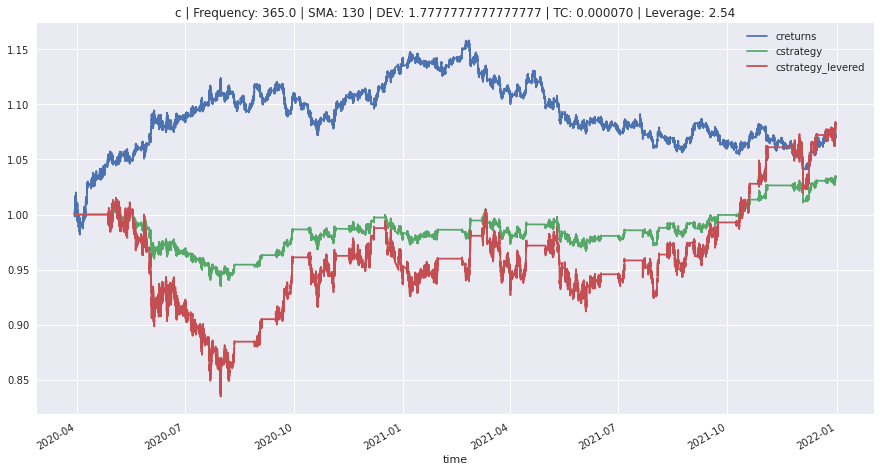

In [4]:
best = tester.results_overview.nlargest(1,columns='Performance')

forward = BBBacktester("AUD_CAD_2016_2021.csv", "c", "2020-01-01", "2021-12-31", spread*pips/2) #mult by 2 for a 'round trip', multiply by pips
forward.test_strategy(freq=best.Freq.values[0], sma=best.Sma.values[0], dev = best.Dev.values[0])
fw_half_kelly = (forward.calculate_kelly_criterion(forward.results.strategy))/2
forward.add_leverage(leverage = fw_half_kelly, sl = -0.35)
forward.plot_results(leverage=True)